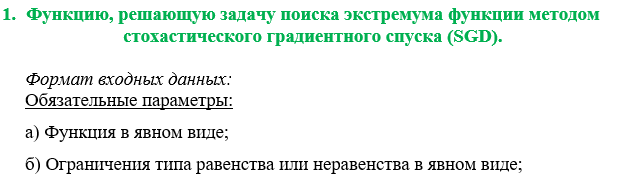

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sympy import *

In [70]:
def f1(x,y):
    return -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2+(y-np.pi)**2))

In [71]:
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f1(X,Y)


In [72]:
x, y = symbols('x y')
eq=-cos(x)*cos(y)*exp(-((x-pi)**2+(y-pi)**2))

In [73]:
def f(x,y):
    return -np.cos(x)*np.cos(y)*np.exp(-((x-np.pi)**2+(y-np.pi)**2))

In [74]:
def SGD_grad(X, Y):
    v = list(ordered(eq.free_symbols))
    gradient = lambda f, v: Matrix([f]).jacobian(v)
    subs_grad=gradient(eq, v).subs([(x,X),(y,Y)]).evalf()
    return np.array(subs_grad).astype(np.float64)[0]

In [75]:
def stochastic_gradient_descent(max_epochs, xy_start, obj_func, grad_func):
    
    xy = xy_start
    xy_history = xy_start
    f_history = obj_func(*xy_start)
    delta_xy = np.zeros(xy_start.shape)
    i = 0
    diff = 1
    l_rate=0.01
    while  i < max_epochs and diff > 1e-8:
        
        choose_var = np.random.randint(xy_start.shape[0])
        grad = np.zeros(shape = xy_start.shape[0])
        grad[choose_var] = grad_func(*xy)[choose_var]
        delta_xy = -l_rate*np.array(grad) + 0.6*delta_xy
        xy = xy+delta_xy
            
        i += 1
        xy_history = np.vstack((xy_history,xy))
        f_history = np.vstack((f_history,obj_func(*xy)))
        diff = np.absolute(f_history[-1]-f_history[-2])
    return xy_history, f_history

In [76]:
opt_res,f_opt = stochastic_gradient_descent(max_epochs = 500,xy_start = np.array([2.5,2.5]),
                                          obj_func = f,grad_func = SGD_grad)

opt_res,f_opt

(array([[2.5       , 2.5       ],
        [2.50572024, 2.5       ],
        [2.50915238, 2.50578672],
        [2.51701255, 2.50925875],
        [2.52757947, 2.51134197],
        [2.53391962, 2.51865035],
        [2.53772371, 2.52917682],
        [2.54000616, 2.54168821],
        [2.54762342, 2.54919505],
        [2.55853142, 2.55369915],
        [2.56507621, 2.56284879],
        [2.57549657, 2.56833858],
        [2.58174879, 2.57827229],
        [2.59215866, 2.58423252],
        [2.59840458, 2.59462608],
        [2.60215213, 2.60773499],
        [2.61136588, 2.61560033],
        [2.62392712, 2.62031954],
        [2.63146386, 2.63025315],
        [2.64312173, 2.63621332],
        [2.65011645, 2.64705176],
        [2.66155907, 2.65355481],
        [2.66842464, 2.66484557],
        [2.67988926, 2.67162003],
        [2.68676804, 2.68317252],
        [2.69089531, 2.69759129],
        [2.69337167, 2.71367101],
        [2.70254956, 2.72331884],
        [2.71577366, 2.72910754],
        [2.731

In [77]:
opt_res[-1]# Итоговая точка

array([3.14027939, 3.14143054])

<IPython.core.display.Javascript object>


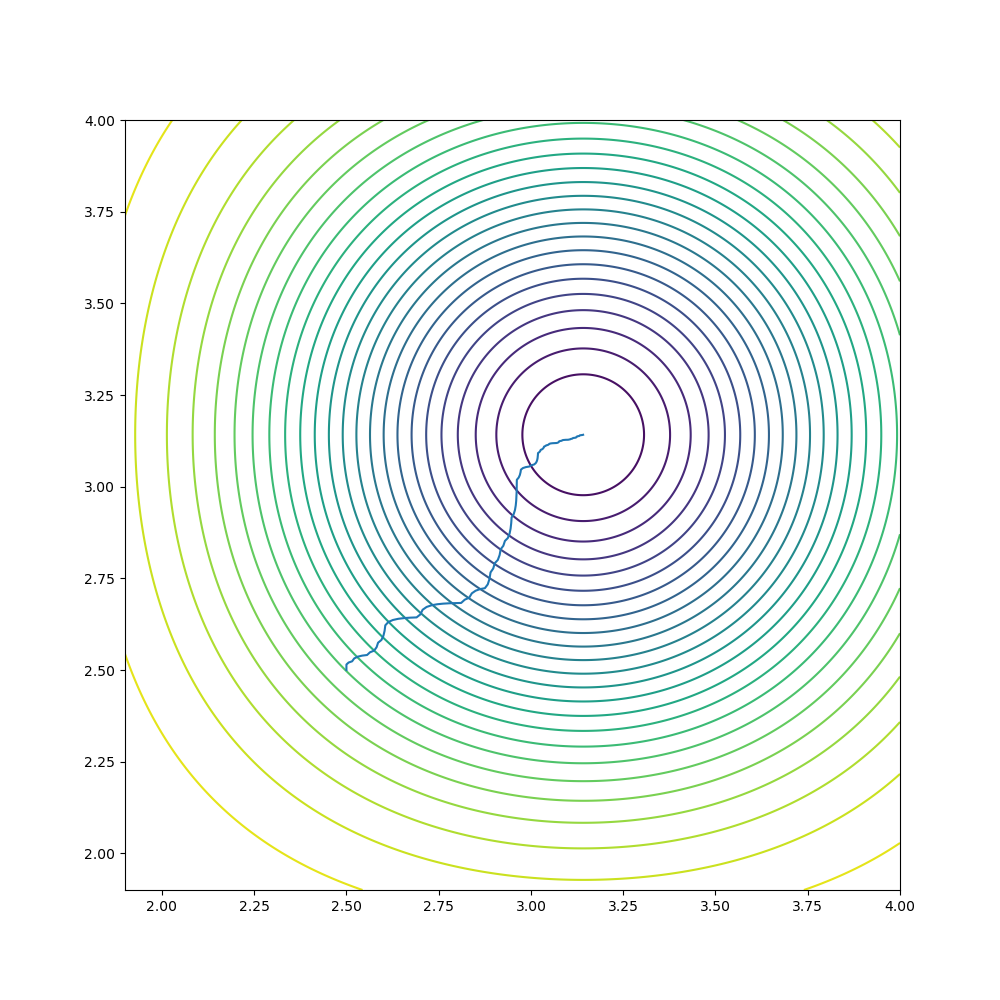

In [53]:
x = np.linspace(1.9,4,1000)
y = np.linspace(1.9,4,1000)
X,Y = np.meshgrid(x,y)
Z = f1(X,Y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=30)
  
ax.plot(opt_res[:,0],opt_res[:,1])

<IPython.core.display.Javascript object>


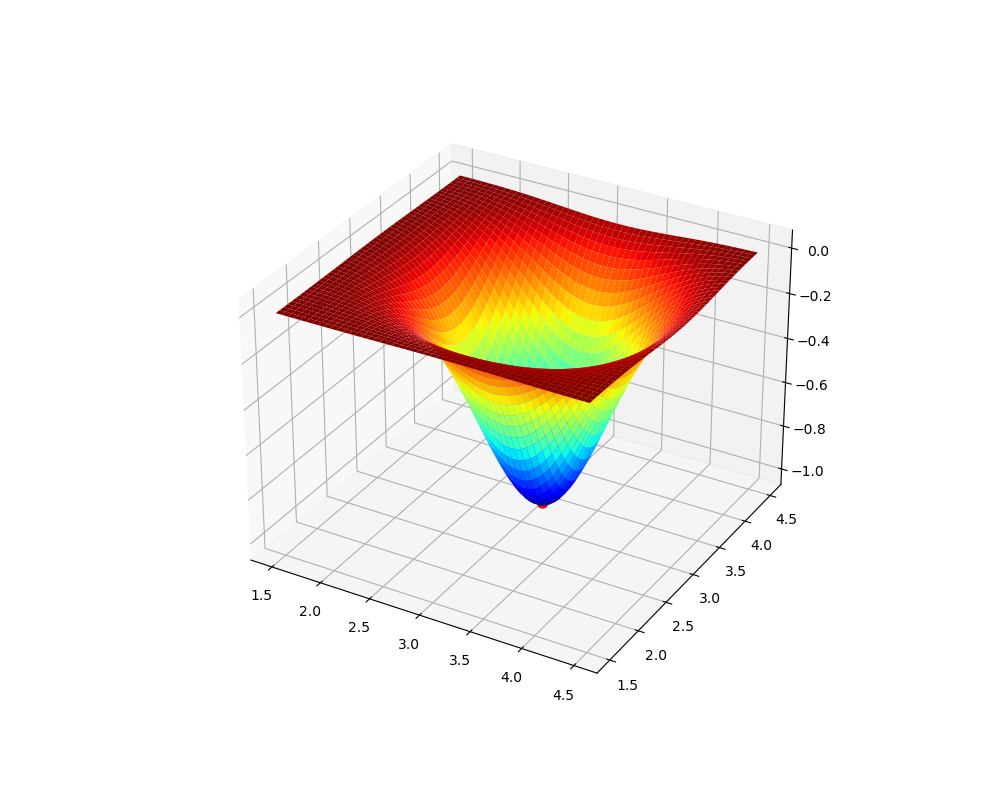

In [54]:
# отметим точку на графике
%matplotlib notebook
x = np.linspace(1.5,4.5,2000)
y = np.linspace(1.5,4.5,2000)
X,Y = np.meshgrid(x,y)
Z = f1(X,Y)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet')
ax.scatter(opt_res[-1],opt_res[-1],-1,facecolor ='red',s=55)

In [55]:
def f2(x, y):
    return (x+2*y-7)**2+(2*x+y-5)**2

In [56]:
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

In [57]:
x, y = symbols('x y')
eq=(x+2*y-7)**2+(2*x+y-5)**2

In [58]:
opt_res,f_opt = stochastic_gradient_descent(max_epochs = 1000,xy_start = np.array([2,-2]),
                                          obj_func = f2,grad_func = SGD_grad)

opt_res,f_opt

(array([[ 2.        , -2.        ],
        [ 2.        , -1.58      ],
        [ 2.2664    , -1.328     ],
        [ 2.64584   , -1.1768    ],
        [ 3.043064  , -1.08608   ],
        [ 3.2813984 , -0.78648512],
        [ 3.49917801, -0.60672819],
        [ 3.66846623, -0.49887404],
        [ 3.77003916, -0.29775144],
        [ 3.83098292, -0.06890587],
        [ 3.82996335,  0.06840148],
        [ 3.82935161,  0.21754867],
        [ 3.76864551,  0.30703698],
        [ 3.73222186,  0.40853463],
        [ 3.71036766,  0.51000201],
        [ 3.62541822,  0.57088243],
        [ 3.50623613,  0.60741069],
        [ 3.43472688,  0.66808768],
        [ 3.33490163,  0.70449388],
        [ 3.27500648,  0.76909608],
        [ 3.19004105,  0.8078574 ],
        [ 3.1390618 ,  0.87512517],
        [ 3.10847425,  0.95684837],
        [ 3.09012171,  1.04151951],
        [ 3.02677646,  1.0923222 ],
        [ 2.98876931,  1.15142947],
        [ 2.96596502,  1.21264934],
        [ 2.95228245,  1.270

In [59]:
opt_res[-1]# итоговая точка

array([1.00032212, 2.99965379])

<IPython.core.display.Javascript object>


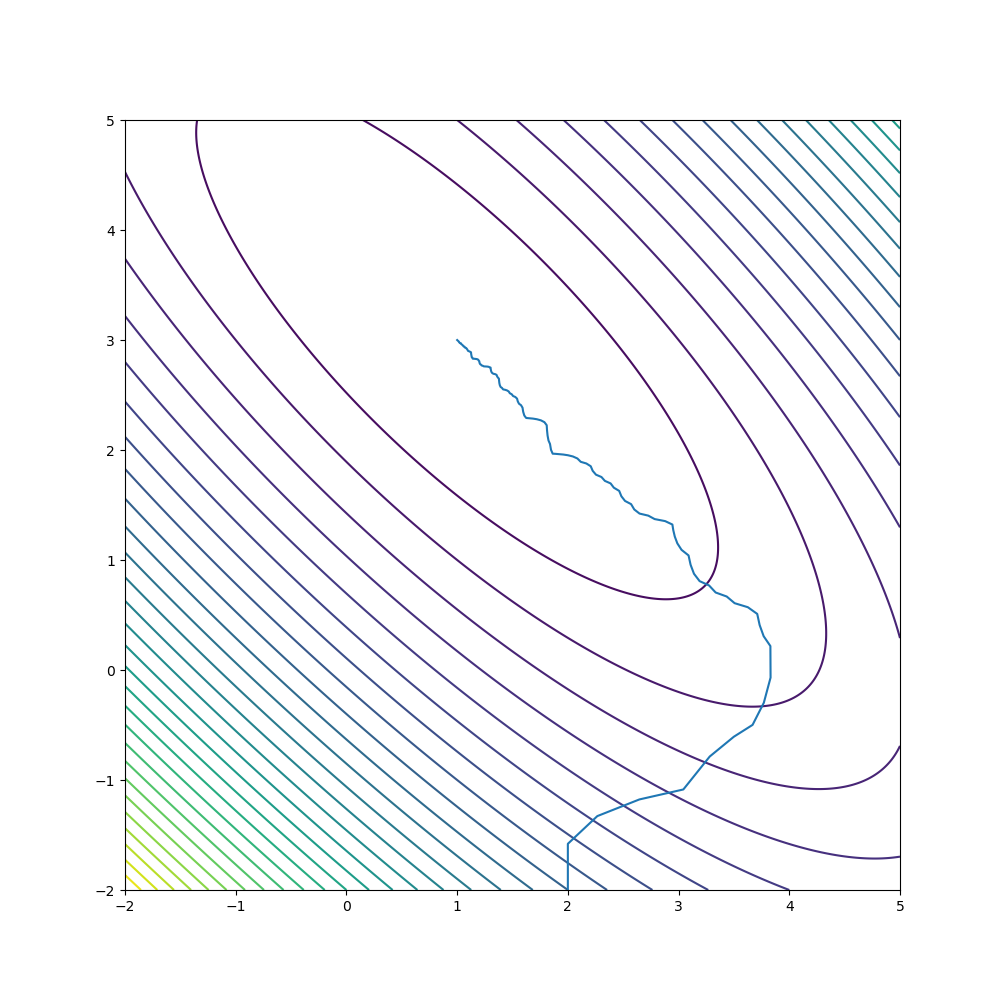

In [60]:
x = np.linspace(-2,5,1000)
y = np.linspace(-2,5,1000)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=30)
  
ax.plot(opt_res[:,0],opt_res[:,1])

<IPython.core.display.Javascript object>


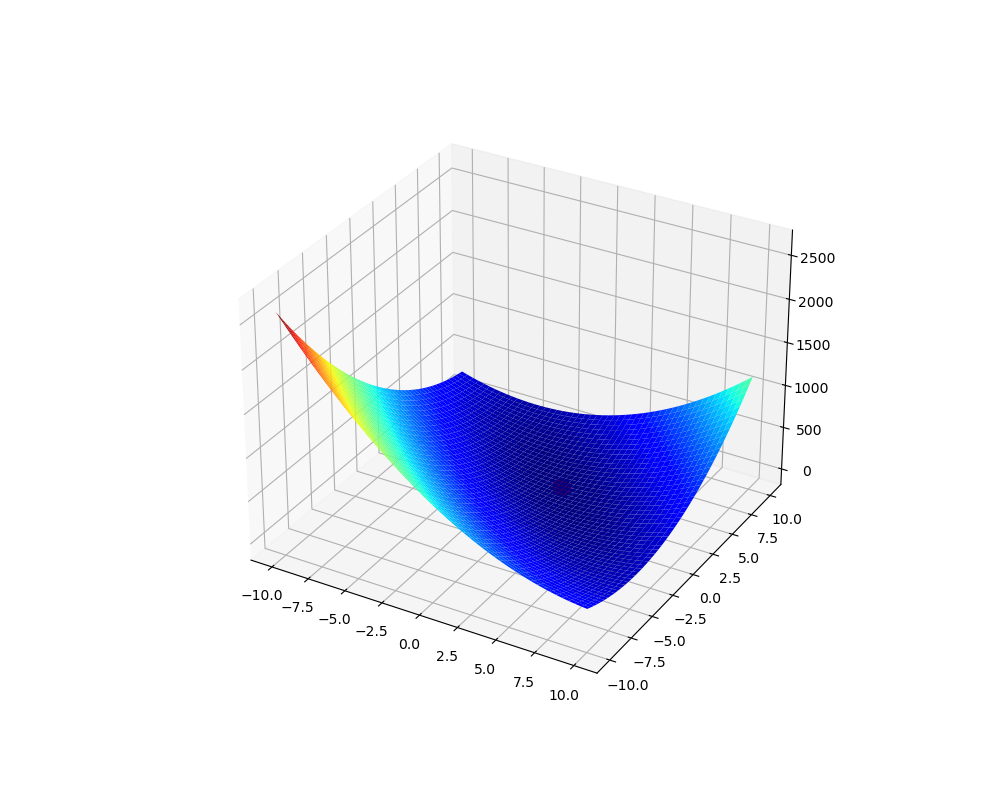

In [61]:
# изобразим на плоскости:
%matplotlib notebook
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet')
ax.scatter(opt_res[-1][0], opt_res[-1][1], facecolor ='red',s=150)

In [62]:
def f3(x, y):
    return 2*x**2+2*y**2+2*x*y+20*x+10*y+10

In [63]:
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f3(X,Y)

In [64]:
x, y = symbols('x y')
eq=2*x**2+2*y**2+2*x*y+20*x+10*y+10

In [65]:
opt_res,f_opt = stochastic_gradient_descent(max_epochs = 1000,xy_start = np.array([2,-2]),
                                          obj_func = f2,grad_func = SGD_grad)

opt_res,f_opt

(array([[ 2.00000000e+00, -2.00000000e+00],
        [ 2.00000000e+00, -2.06000000e+00],
        [ 1.76120000e+00, -2.09600000e+00],
        ...,
        [-4.99999847e+00, -1.50697605e-06],
        [-4.99999854e+00, -1.48927217e-06],
        [-4.99999858e+00, -1.44832908e-06]]),
 array([[ 90.        ],
        [ 92.538     ],
        [101.7106056 ],
        [109.94895485],
        [117.28970268],
        [123.82118944],
        [136.28437225],
        [145.6953126 ],
        [160.27265551],
        [178.37091059],
        [190.37344016],
        [198.00502727],
        [202.65907182],
        [213.81189494],
        [220.28015393],
        [223.65777304],
        [225.06824962],
        [225.26979611],
        [233.25102075],
        [237.31454774],
        [247.4205337 ],
        [261.09888698],
        [268.06914088],
        [270.72004575],
        [270.72068366],
        [269.1836634 ],
        [274.90433804],
        [284.89354379],
        [297.2477334 ],
        [302.74889935],
 

In [66]:
opt_res[-1]# итоговая точка

array([-4.99999858e+00, -1.44832908e-06])

<IPython.core.display.Javascript object>


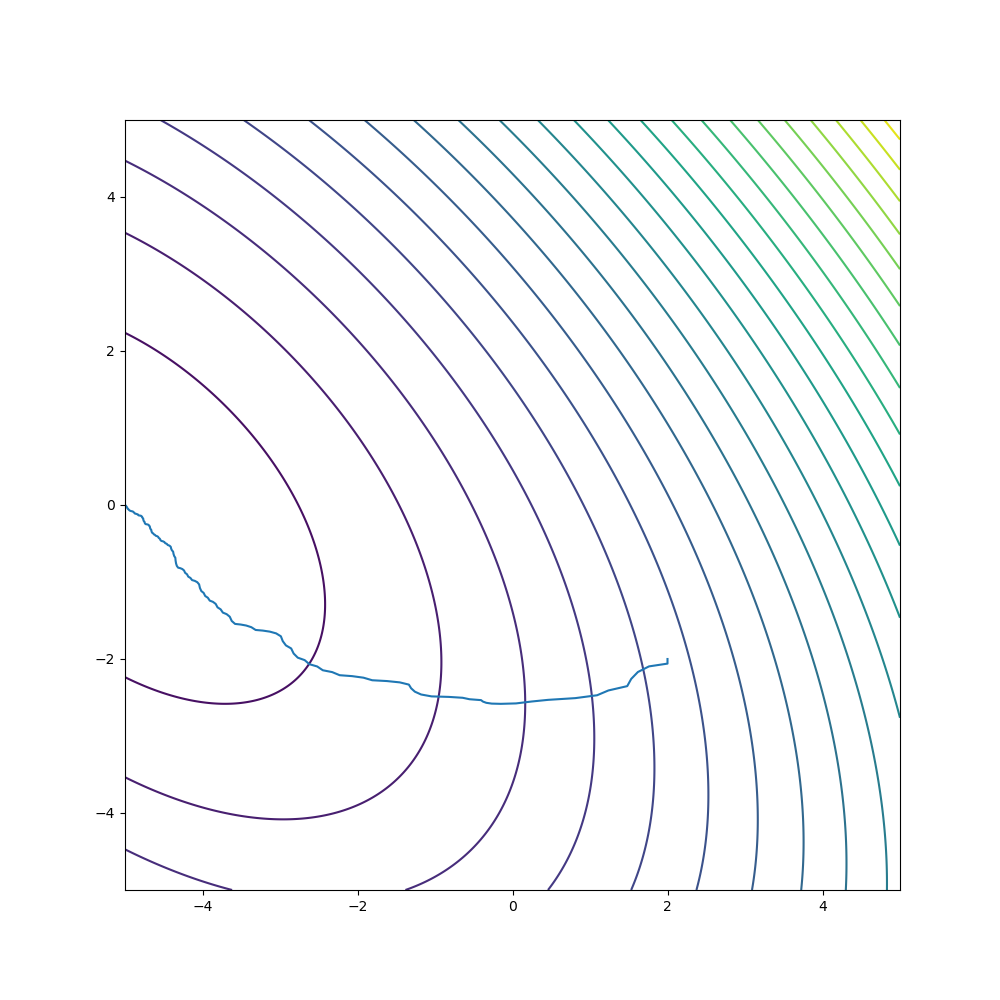

In [67]:
x = np.linspace(-5,5,1000)
y = np.linspace(-5,5,1000)
X,Y = np.meshgrid(x,y)
Z = f3(X,Y)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.contour(X,Y,Z, levels=30)
  
ax.plot(opt_res[:,0],opt_res[:,1])

<IPython.core.display.Javascript object>


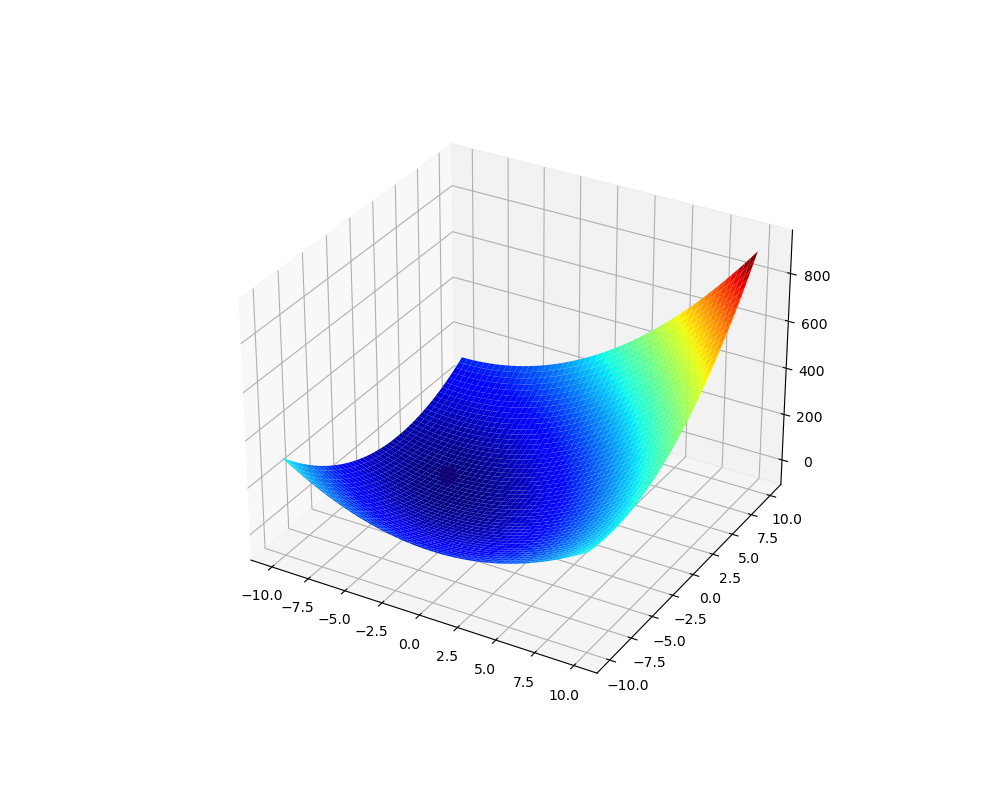

In [68]:
# изобразим на плоскости:
%matplotlib notebook
x = np.linspace(-10,10,2000)
y = np.linspace(-10,10,2000)
X,Y = np.meshgrid(x,y)
Z = f3(X,Y)
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap='jet')
ax.scatter(opt_res[-1][0], opt_res[-1][1], facecolor ='red',s=150)